### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Импорт неоходимых библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

#### Загрузка данных
Загрузим данные в соответствующие переменные и выведем общую информацию.

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 309901 entries, 0 to 309900

Data columns (total 6 columns):

 #   Column         Non-Null Count   Dtype 

---  ------         --------------   ----- 

 0   User Id        309901 non-null  int64 

 1   Region         309901 non-null  object

 2   Device         309901 non-null  object

 3   Channel        309901 non-null  object

 4   Session Start  309901 non-null  object

 5   Session End    309901 non-null  object

dtypes: int64(1), object(5)

memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 40212 entries, 0 to 40211

Data columns (total 3 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   User Id   40212 non-null  int64  

 1   Event Dt  40212 non-null  object 

 2   Revenue   40212 non-null  float64

dtypes: float64(1), int64(1), object(1)

memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1800 entries, 0 to 1799

Data columns (total 3

**Не наблюдаем ни единого пропуска во всех трех таблицах.** Для удобства приведем названия столбцов к более утилитарным.

In [4]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

#### Проверка на явные и неявные дубликаты
Проверим данные на наличие неявных дубликатов. Для этого просмотри уникальные значения столбцов region, device, channel из таблицы visits, и столбца channel таблицы costs, то есть столбцов, где значения замписаны словами.

In [5]:
print('Таблица visits:')
print('Уникальные значения столбца region:' ,sorted(visits['region'].unique()))
print('Уникальные значения столбца device:' ,sorted(visits['device'].unique()))
print('Уникальные значения столбца channel:' ,sorted(visits['channel'].unique()))
print('Таблица costs:')
print('Уникальные значения столбца channel:' ,sorted(costs['channel'].unique()))

Таблица visits:

Уникальные значения столбца region: ['France', 'Germany', 'UK', 'United States']

Уникальные значения столбца device: ['Android', 'Mac', 'PC', 'iPhone']

Уникальные значения столбца channel: ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds', 'organic']

Таблица costs:

Уникальные значения столбца channel: ['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado', 'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner', 'YRabbit', 'lambdaMediaAds']


**Не наблюдаем ни единого неявного дубликата.** Проверим явные дубликаты.

In [6]:
print('Дубликаты таблицы visits:', visits.duplicated().sum())
print('Дубликаты таблицы orders:', orders.duplicated().sum())
print('Дубликаты таблицы costs:', costs.duplicated().sum())

Дубликаты таблицы visits: 0

Дубликаты таблицы orders: 0

Дубликаты таблицы costs: 0


**Явных дубликатов не обнаружено.** Исходные данные очень хорошего качества.

#### Приведение к нужному типу данных
Из пункта 1.2 видим типы данных для каждого столбца. Типы данных всех столбцов соответствуют записанным в них данным, но для дальнейшей работы понадобится перевести столбцы с датой и временем в формат datetime.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 309901 entries, 0 to 309900

Data columns (total 6 columns):

 #   Column         Non-Null Count   Dtype         

---  ------         --------------   -----         

 0   user_id        309901 non-null  int64         

 1   region         309901 non-null  object        

 2   device         309901 non-null  object        

 3   channel        309901 non-null  object        

 4   session_start  309901 non-null  datetime64[ns]

 5   session_end    309901 non-null  datetime64[ns]

dtypes: datetime64[ns](2), int64(1), object(3)

memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 40212 entries, 0 to 40211

Data columns (total 3 columns):

 #   Column    Non-Null Count  Dtype         

---  ------    --------------  -----         

 0   user_id   40212 non-null  int64         

 1   event_dt  40212 non-null  datetime64[ns]

 2   revenue   40212 non-null  float64       

dtypes: datetime64[ns](1), float64(1), int64(

In [8]:
display(costs.head())

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Промежуточный итог:**
- данные загружены и изучена общая информация,
- данные проверены на пропуски, явные и неявные дубликаты,
- типы данных приведены к необходимым для дальнейшей работы.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]): #events, 

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
    #        )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для подсчёта Retention Rate

In [10]:
# функция для подсчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта конверсии

In [11]:
# функция для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта LTV и ROI

In [12]:
# функция для подсчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания данных

In [13]:
# функция для сглаживания данных

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для построения графика Retention Rate

In [14]:
# функция для построения графика Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для построения графика конверсии

In [15]:
# функция для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профилей пользователей

In [17]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей.

In [18]:
print('Минимальная дата привлечения пользователей:', profiles['first_ts'].min())
print('Максимальная дата привлечения пользователей:', profiles['first_ts'].max())

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41

Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


#### Пользователи по странам
Определим из каких стран пользователи приходят в приложение и какая из них доля платящих.

In [19]:
display(
    profiles.groupby('region')['payer'].agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
)

,mean,count
region,,
United States,0.069019,100002
UK,0.039829,17575
France,0.037994,17450
Germany,0.041119,14981


Пользователи приходят из США, Великобритании, Франции и Германии. Наблюдаем следующее:
- самое большое количество пользователей (около половины от общего числа) приходят и США, среди которых 6.9 % платящих,
- из Франции и Великобритании примерно поровну, процент платящих пользователей - 4.0 % и 3.8 % соответственно, 
- наименьшее количество пользователей из Германии, среди которых 4.1 % платящих.

#### Пользователи по используемым устройствам
Определим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [20]:
display(
    profiles.groupby('device')['payer'].agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
)

,mean,count
device,,
iPhone,0.062079,54479
Android,0.058518,35032
PC,0.050468,30455
Mac,0.063644,30042


Пользователи используют смартфоны iPhone, смартфоны с системой Android, а так же компьютеры PC и компьютеры Mac. Наблюдаем следующее:
- самое большое количество пользователей используют iPhone, среди которых 6.2 % платящих,
- на втором месте по популярности - Android, процент платящих пользователей - 5.9 % платящих, 
- PC и Mac используют примерно одинаковое количество пользователй, среди которых 5.0 % и 6.4 % соответственно.

#### Пользователи по способу привлечения
Определим каким образом были привлечены пользователи и какая из них доля - платящие.

In [21]:
display(
    profiles.groupby('channel')['payer'].agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
)

,mean,count
channel,,
organic,0.020553,56439
FaceBoom,0.122049,29144
TipTop,0.096007,19561
OppleCreativeMedia,0.027077,8605
LeapBob,0.030633,8553
WahooNetBanner,0.052964,8553
RocketSuperAds,0.079137,4448
MediaTornado,0.035747,4364
YRabbit,0.038265,4312


По способу привлечения наблюдаем следующее:
- самое большое количество пользователей пришли сами, среди которых 2.1 % платящих,
- из "платных" способов больше всего пользователей привлек FaceBoom, а самое наменьшее количество привлек lambdaMediaAds,
- самый высоки процент платящих пользователей у FaceBoom - 12.2 %, а самый низкий процент у OppleCreativeMedia - 2.7 %.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расходы на маркетинг
Посчитаем, общую сумму расходов на маркетинг.

In [22]:
print('Общие расходы на маркетинг:', round(costs['costs'].sum(), 2))

Общие расходы на маркетинг: 105497.3


#### Распределение расходов по рекламным источникам
Сгруппируем данные таблицы costs по каналам и найдем сумму затрат по каждому каналу.

In [23]:
display(costs.groupby('channel')['costs'].agg('sum').sort_values(ascending = False))

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

По распределению средств наблюдаем следующее:
- самые большие траты идут на TipTop и FaceBoom,
- самые маленькие траты на MediaTornado и YRabbit.

#### Динамика изменения расходов
Построим графики динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.  
Так как данные только в рамках 2019 года, сгруппируем только по месяцам и неделям. Если бы интервал выходил за рамки каледарного года, группировали бы и по года тоже.

Text(0.5, 0, 'Номер месяца')

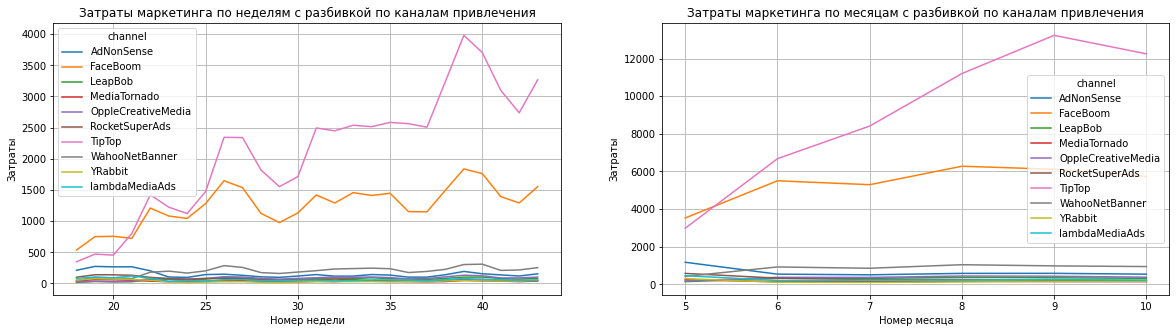

In [24]:
# Добавим дополнительные столбцы с номерами недель и месяцев
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

# Сводные таблицы по неделям и месяцам
costs_per_week = costs.pivot_table(index='week', 
                                   columns='channel', 
                                   values='costs', 
                                   aggfunc='sum')

costs_per_month = costs.pivot_table(index='month', 
                                    columns='channel', 
                                    values='costs', 
                                    aggfunc='sum')

# Графики
plt.figure(figsize = (20, 5))
costs_per_week.plot(grid = True, ax=plt.subplot(1, 2, 1))
plt.title('Затраты маркетинга по неделям с разбивкой по каналам привлечения')
plt.ylabel('Затраты')
plt.xlabel('Номер недели')


costs_per_month.plot(grid = True, ax=plt.subplot(1, 2, 2))
plt.title('Затраты маркетинга по месяцам с разбивкой по каналам привлечения')
plt.ylabel('Затраты')
plt.xlabel('Номер месяца')

**Промежуточный итог:** оба графика подтверждают вывод из предыдущего пункта, что самые большие траты идут на TipTop и FaceBoom, причем для TipTop наблюдается увеличение затрат с течением времени.

#### Стоимость привлечения пользователя (CAC)
Расчитаем среднее CAC для каждого источника.

In [25]:
display(profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False))

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Самая высокая средняя стоимость привлечения клиентов у TipTop, а самая низкая у YRabbit, MediaTornado и LeapBob (не считая пользователей, пришедших самостоятельно).

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Основные бизнес-показатели
Расчитаем LTV, ROI, CAC и построим графики. Для этого зададим момент 1 ноября 2019 года, и горизонт анализа данных - 14 дней. При этом для анализа окупаемости будем учитывать только привлеченных пользователей, не organic. Для этого сделаем срезы таблиц  profiles, visits и orders, записав их в profiles_wo_organic, visits_wo_organic и orders_wo_organic соответственно.

In [26]:
profiles_wo_organic = profiles.query('channel != "organic"')
visits_wo_organic = visits.query('channel != "organic"')
orders_wo_organic = orders[orders['user_id'].isin(profiles_wo_organic['user_id'])]

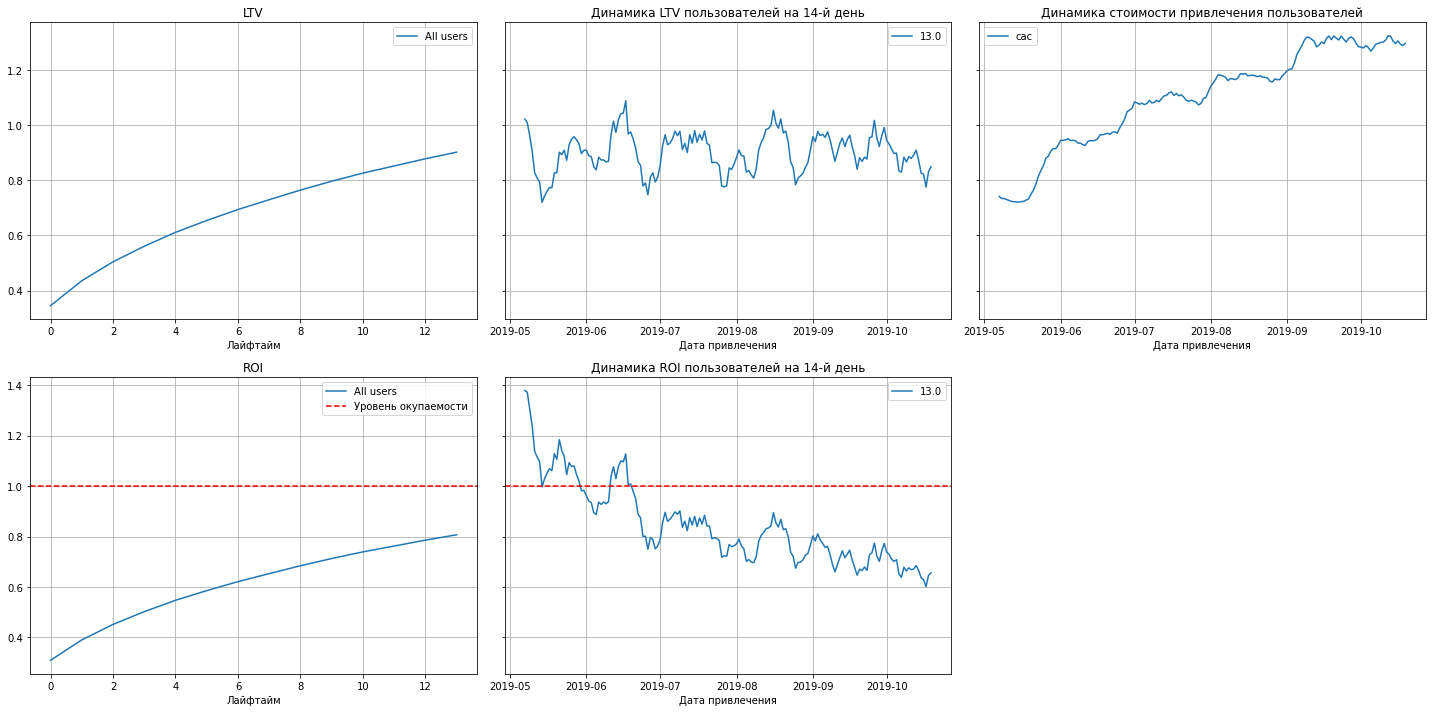

In [27]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
- маркетинг не окупается, на 14й день график ROI не пересекает линию окупаемости,
- LTV не проявляет ярко выраженной сезонной активности,
- CAC постепенно возрастал, а ROI постепено снижался, что может свидетельствовать тому, что расходы увеличивались на не самые эффективные каналы.

#### Конверсия пользователей
Расчитаем конверсию платящих и неплатящих пользователей, удержание и их динамику их изменения. Построим соответствующие графики.

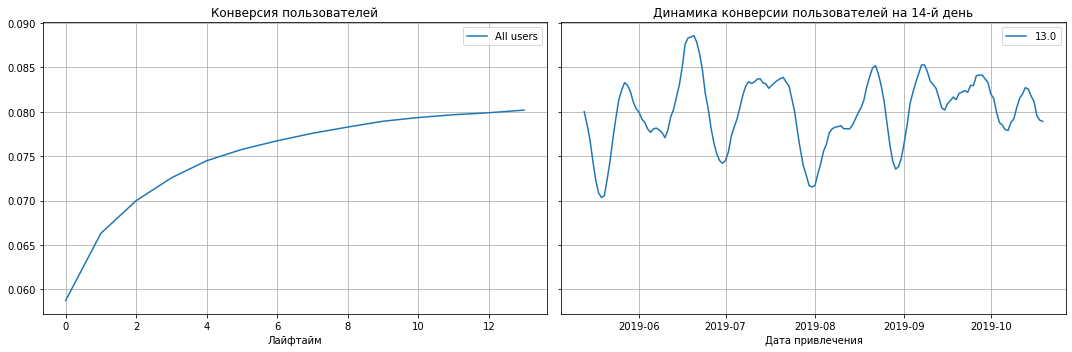

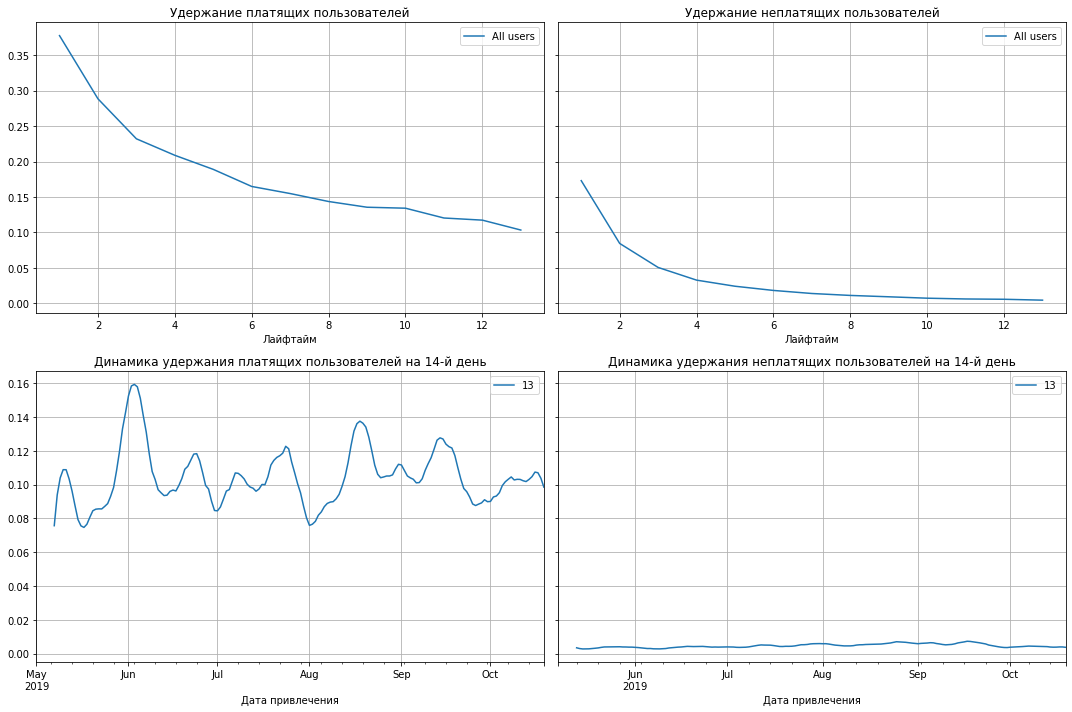

In [28]:
# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days
)
window = 7 # ширина окна для сглаживания графика
plot_conversion(conversion_grouped, filter_data(conversion_history, window), horizon_days)

# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_organic, visits_wo_organic, observation_date, horizon_days
)
plot_retention(retention_grouped, filter_data(retention_history, window), horizon_days)


По графиком видим:
- графики конверсии и удержания пользователей выглядят ожидаемо, без аномалий,
- динамика удержания платящих пользователей ожидемо выше динамики удержания неплатящих, равно как и само удержание.

#### Основные бизнес-показатели с разбивкой по устройствам
Расчитаем LTV, ROI, CAC с разбивкой по устройствам пользователей и построим графики. Для этого зададим момент 1 ноября 2019 года, и горизонт анализа данных - 14 дней. 

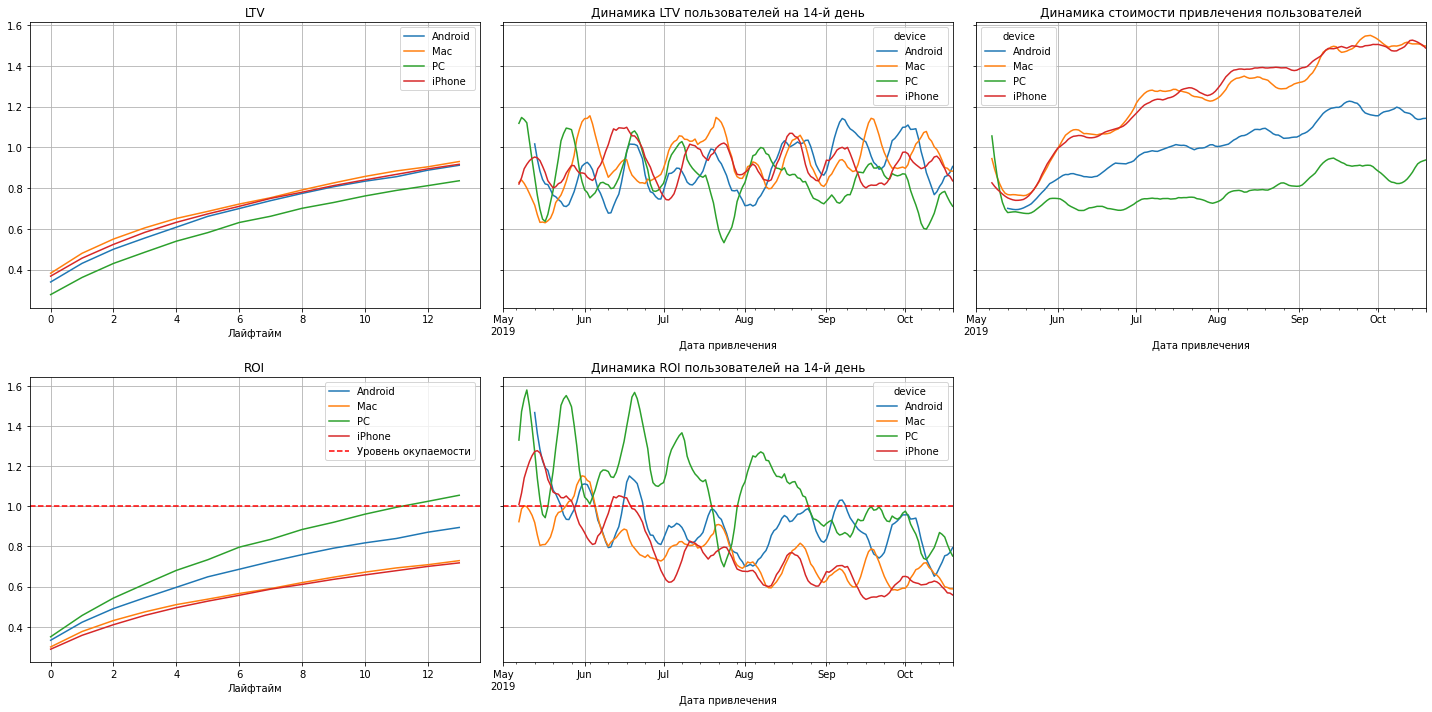

In [29]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
window = 7 # ширина окна для сглаживания графика

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days, dimensions=['device'])

# строим графики
plot_ltv_roi(ltv_grouped, 
             filter_data(ltv_history, window), 
             roi_grouped, 
             filter_data(roi_history, window), 
             horizon_days)

По графику ROI видим, что окупаются только пользователи с PC, пользователи с Android не окупаются на горизонте анализа, а пользователи Mac и iPhone примерно одинаково неокупаются хуже всего. При этом видим, что CAC для Android и PC стабильно ниже остальных.

Проверим, возможно, дело в низкой конверсии или низком удержании. Для этого построим графики конверсии и удержании с разбивкой по устройствам пользователей.

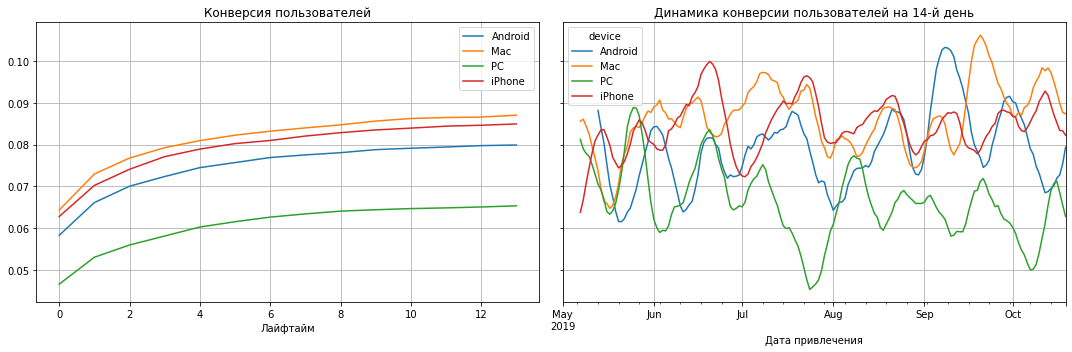

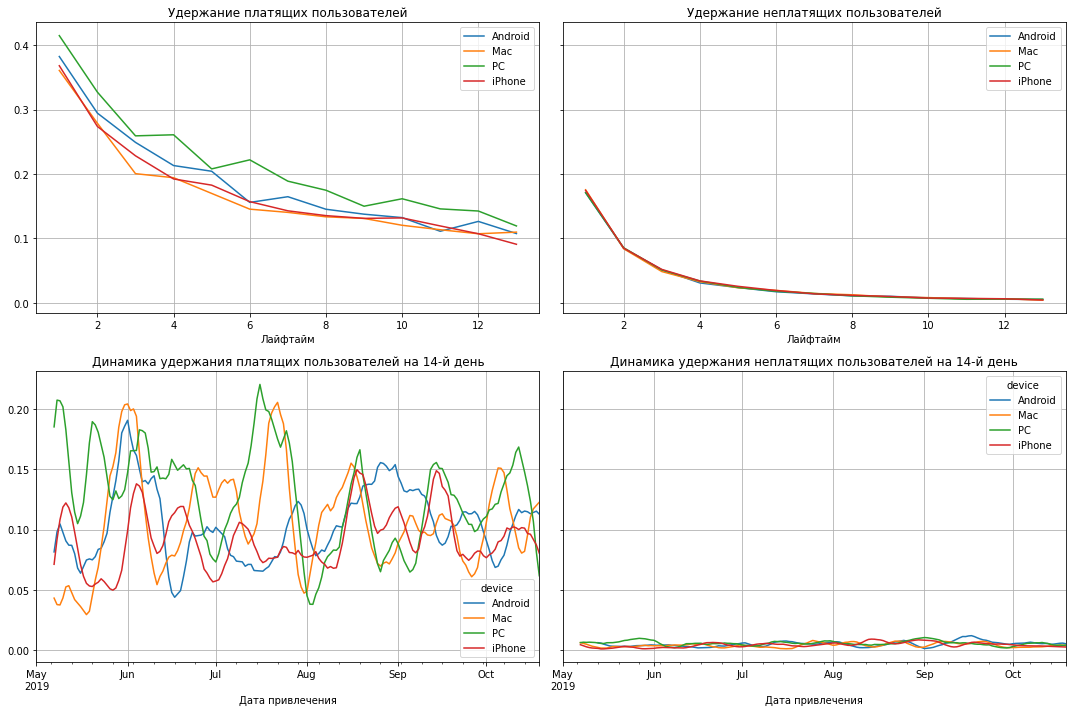

In [30]:
# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days, dimensions=['device']
)
window = 7 # ширина окна для сглаживания графика
plot_conversion(conversion_grouped, filter_data(conversion_history, window), horizon_days)

# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_organic, visits_wo_organic, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, filter_data(retention_history, window), horizon_days)

Конверсия пользователей Mac, iPhone и  Android выше, чем у PC, хотя удержание платящих пользователей меньше, но не кардинально.


То есть получается, что пользователи Mac, iPhone и  Android имеют лучше конверсию, примерно равное с остальными пользователями удержание, но не окупаются, так как стоимость привлечения таких пользователей стоит слишком дорого.

#### Основные бизнес-показатели с разбивкой по странам
Расчитаем LTV, ROI, CAC с разбивкой по странам пользователей и построим графики. Для этого зададим момент 1 ноября 2019 года, и горизонт анализа данных - 14 дней. 

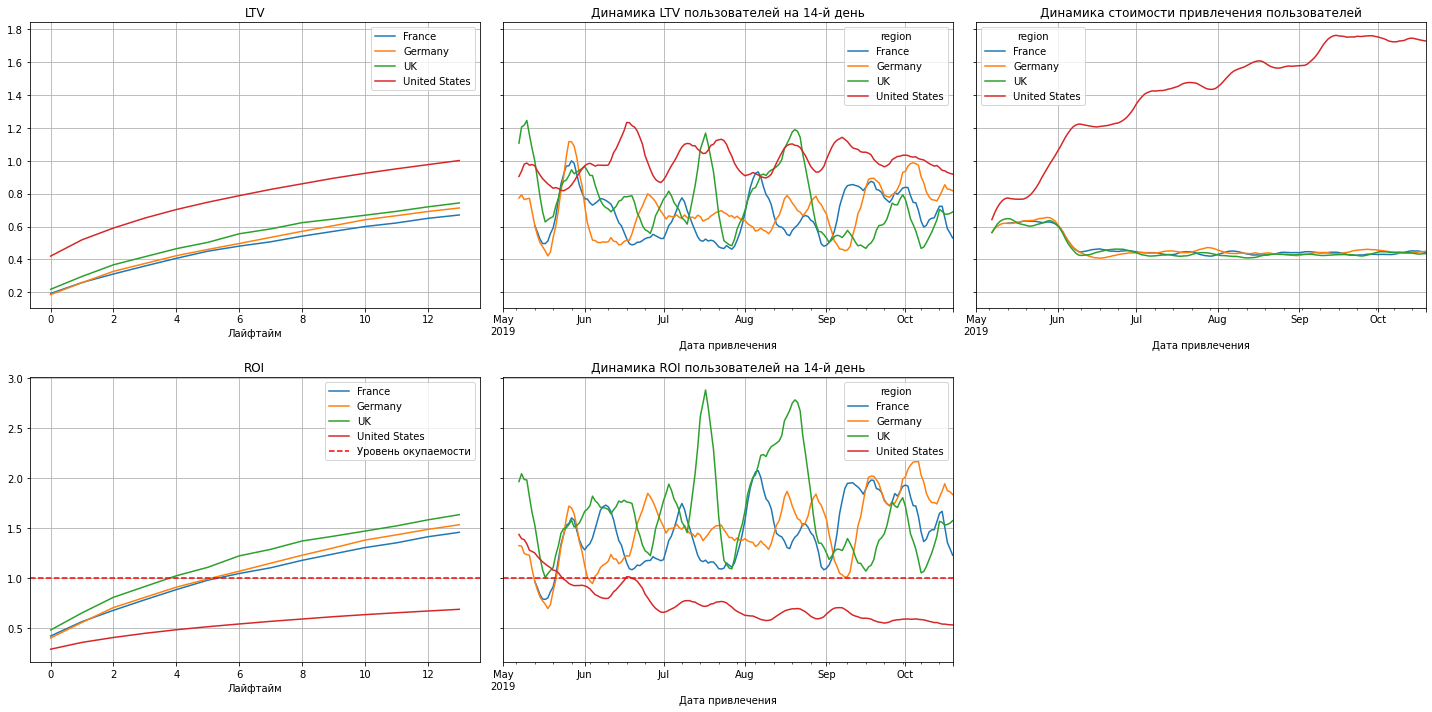

In [31]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
window = 7 # ширина окна для сглаживания графика

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days, dimensions=['region'])

# строим графики
plot_ltv_roi(ltv_grouped, 
             filter_data(ltv_history, window), 
             roi_grouped, 
             filter_data(roi_history, window), 
             horizon_days)

По графику ROI видим, что пользователи из США не окупаются на горизонте анализа, в то время как пользователи из остальных стран окупаются примерно одинаково за 4-5 дней. При этом видим, как CAC пользователей из США возрастает примерно с 0.6 до 1.7, в то время как для пользователей остальных стран уменьшается с 0.6 в мае до 0.4 с июня до конца рассматриваемого временного интервала.

Построим графики конверсии и удержании с разбивкой по странам пользователей.

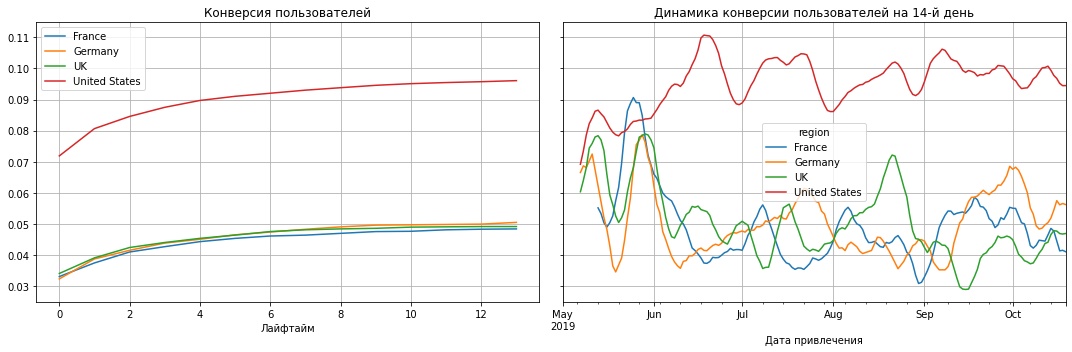

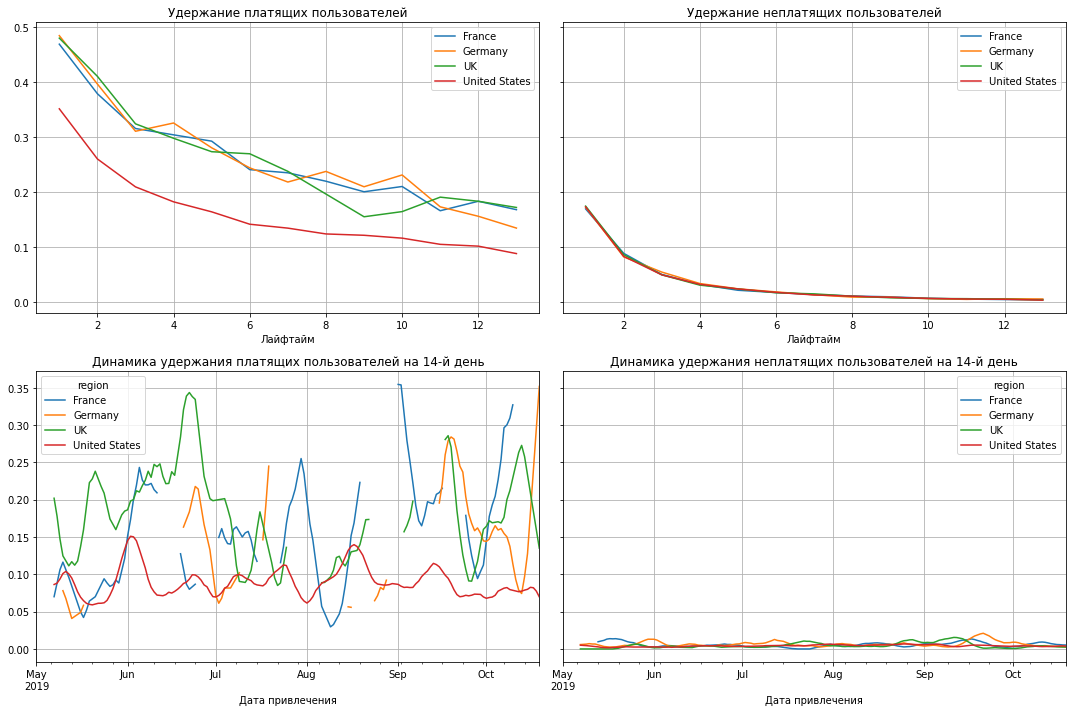

In [32]:
# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days, dimensions=['region']
)
window = 7 # ширина окна для сглаживания графика
plot_conversion(conversion_grouped, filter_data(conversion_history, window), horizon_days)

# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_organic, visits_wo_organic, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention_grouped, filter_data(retention_history, window), horizon_days)

При этом наблюдаем, что конверсия пользователей из США значительно выше остальных, но удержание платящих пользователей значительно ниже. В совокупности с высокой стоимостью привлечения таких пользователей приводит к тому, что пользователи из США не окупаются.

#### Основные бизнес-показатели с разбивкой по каналам
Расчитаем LTV, ROI, CAC с разбивкой по каналам пользователей и построим графики. Для этого зададим момент 1 ноября 2019 года, и горизонт анализа данных - 14 дней. 

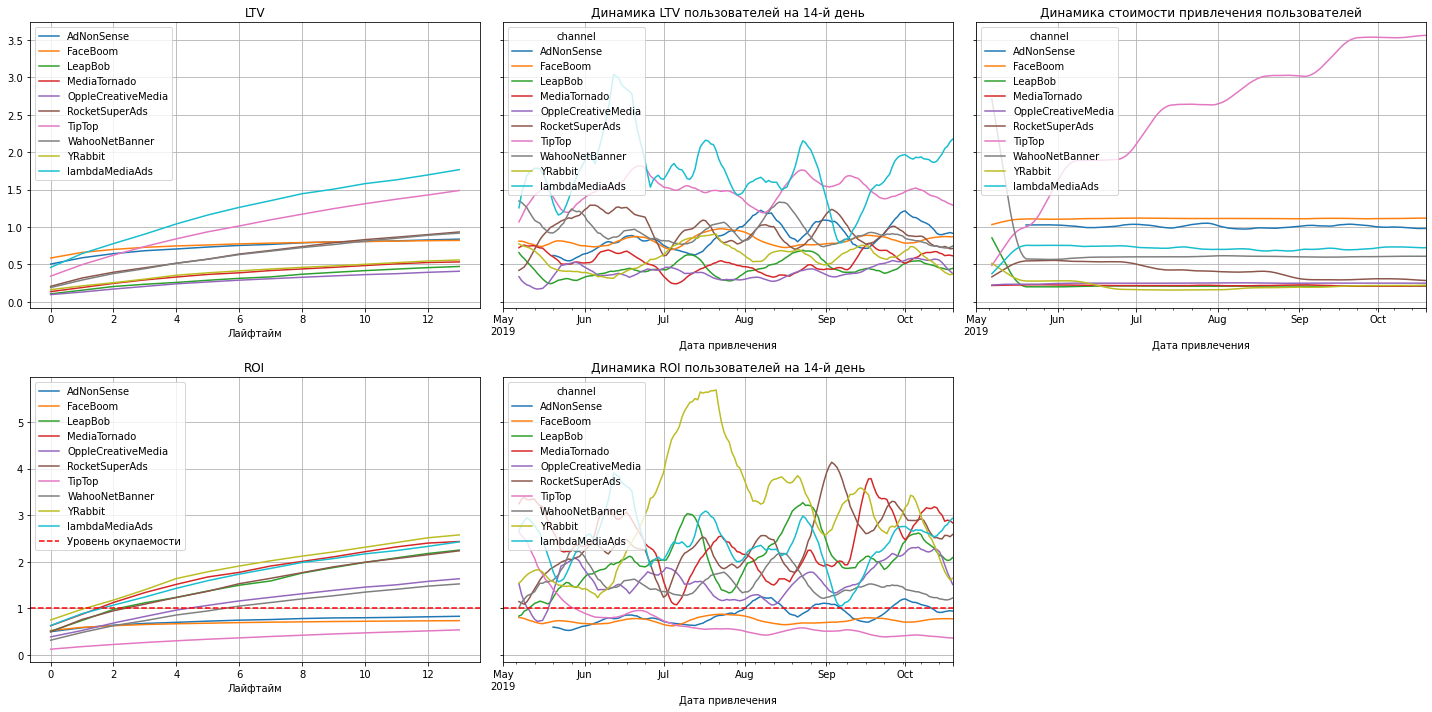

In [33]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
window = 14 # ширина окна для сглаживания графика

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days, dimensions=['channel'])

# строим графики
plot_ltv_roi(ltv_grouped, 
             filter_data(ltv_history, window), 
             roi_grouped, 
             filter_data(roi_history, window), 
             horizon_days)

По графику ROI видим, что не окупаются пользователи по каналам AdNonSense, FaceBoom и TipTop, при этом по графику CAC видим, что данные каналы имеют наибольшую стоимость привлечения пользователей, кроме того стоимость привлечения у канала TipTop постоянно увеличивается примерно с 0.5 до 3.5.

Построим графики конверсии и удержании с разбивкой по каналам.

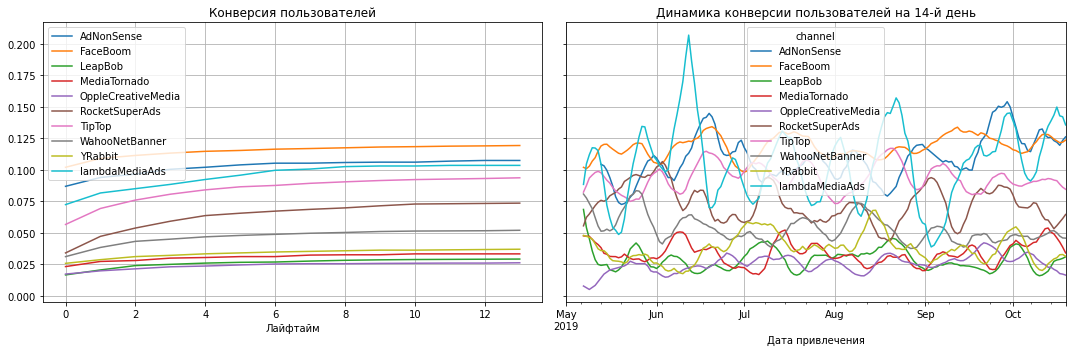

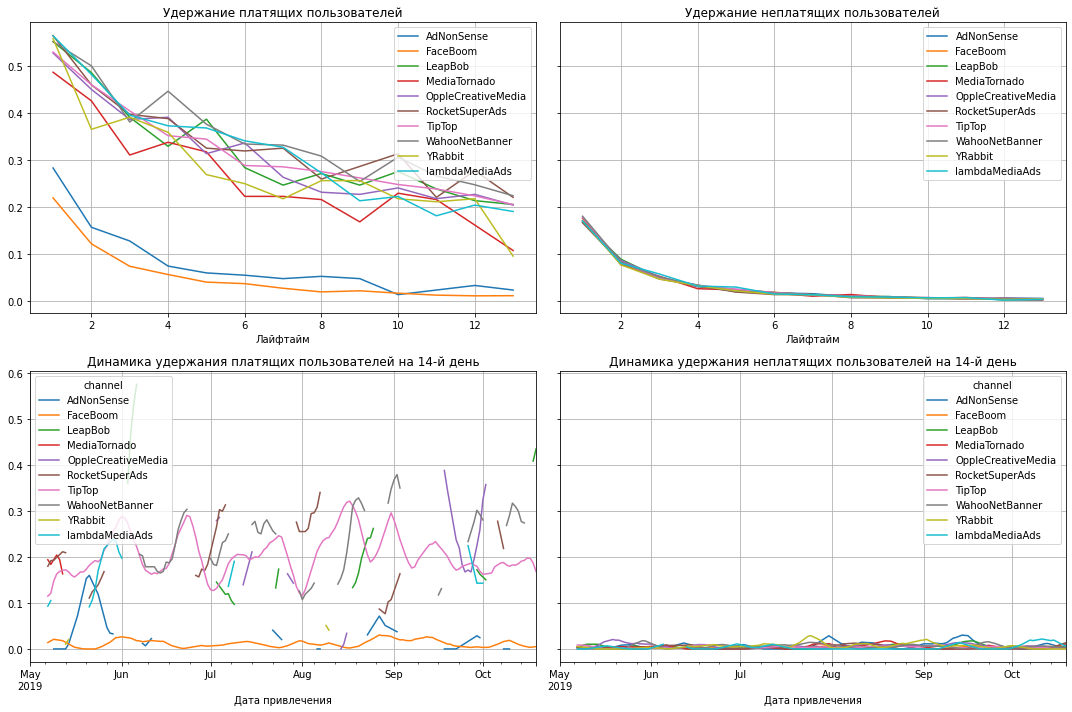

In [34]:
# Конверсия
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_organic, orders_wo_organic, observation_date, horizon_days, dimensions=['channel']
)
window = 7 # ширина окна для сглаживания графика
plot_conversion(conversion_grouped, filter_data(conversion_history, window), horizon_days)

# Удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_organic, visits_wo_organic, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, filter_data(retention_history, window), horizon_days)

Не считая lambdaMediaAds, у каналов AdNonSense, FaceBoom и TipTop самая высокая конверсия пользователей, но удержание у каналов AdNonSense и FaceBoom значительно ниже, чем у остальных.

То есть скорее всего каналы AdNonSense и FaceBoom не окупаются из-за низкого удержания платящих пользователей, а канал TipTop не окупается из-за высоких расходов на привлечение пользователей.

Проанализировав полученные результаты, имеется гипотеза, что выявленные проблемы взаимосвязаны. Построим таблицы: количество пользователей по странам, распределение устройств по странам и распределение каналов по странам.

In [35]:
print('Количество пользователей по странам')
display(profiles_wo_organic.groupby('region')['user_id'].agg('count'))

print('Распределение устройств по странам')
display(profiles_wo_organic.pivot_table(index='region', columns='device', values='user_id', aggfunc='count'))

print('Распределение устройств по странам по каналу TipTop')
display(
    profiles_wo_organic[profiles_wo_organic['channel']=='TipTop']
    .pivot_table(index='region', columns='device', values='user_id', aggfunc='count')
)

print('Распределение каналов по странам')
display(profiles_wo_organic.pivot_table(index='region', columns='channel', values='user_id', aggfunc='count'))

Количество пользователей по странам


region
France           11058
Germany           9528
UK               11154
United States    61829
Name: user_id, dtype: int64

Распределение устройств по странам


device,Android,Mac,PC,iPhone
region,,,,
France,3313,1163,4384,2198
Germany,2849,1020,3797,1862
UK,3243,1086,4551,2274
United States,12436,15424,6421,27548


Распределение устройств по странам по каналу TipTop


device,Android,Mac,PC,iPhone
region,,,,
United States,3889,4820,2012,8840


Распределение каналов по странам


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
region,,,,,,,,,,
France,1366.0,NaN,2988.0,NaN,2991.0,NaN,NaN,2971.0,NaN,742.0
Germany,1219.0,NaN,2519.0,NaN,2562.0,NaN,NaN,2579.0,NaN,649.0
UK,1295.0,NaN,3046.0,NaN,3052.0,NaN,NaN,3003.0,NaN,758.0
United States,NaN,29144.0,NaN,4364.0,NaN,4448.0,19561.0,NaN,4312.0,NaN


#### Вывод

- Реклама, направленная на привлечение пользователей в целом не окупается.
- Негативное влияние на окупаемость могут влиять:
    - среди устройств Mac, iPhone и Android, хотя очевидные проблемы выявлены не были,
    - среди стран США, в которой обнаружены низкие показатели по удержанию пользователей и высокие затраты на привлечение,
    - среди каналов AdNonSense и FaceBoom, у которых наблюдаются очень низкие показания по удержанию пользователей, и канал TipTop, у которого обнаружены очень высокая увеличивающаяся стоимость привлечения пользователей.

Проанализировав таблицы распределения устройств и каналов по странам, можно сделать выводы:
- У каналов AdNonSense и FaceBoom имеется проблема с удержанием пользователей, что может быть признаком недостоверной рекламной информации, передаваемых по данным каналам, в следствии чего пользователи не хотят возвращаться.
- Имеется взаимосвязь между неокупаемостью устройств Mac, iPhone и Android, неокупаемостью по стране США и каналу TipTop. Самое большое количество пользователей Mac и iPhone находятся в США, а канал TipTop привлекает пользователей только в США, причем по этому каналу в США было привлечена почти треть пользователей по каждоуму каналу. Из чего можно сделать вывод, что скорее всего увеличение расходов на канал TipTop приводит к неокупаемости самого канала, страны США и как следствие устройств Mac, iPhone и Android, так как увеличение расходов не приодит к увеличению качества пользователей.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Общий вывод**
- У каналов AdNonSense и FaceBoom имеется проблема с удержанием пользователей, что может быть признаком недостоверной рекламной информации, передаваемых по данным каналам.
- Имеется взаимосвязь между неокупаемостью устройств Mac и iPhone, неокупаемостью по стране США и каналу TipTop. Самое большое количество пользователей Mac и iPhone находятся в США, а канал TipTop привлекает пользователей только в США, причем по этому каналу в США было привлечена почти треть пользователей по каждоуму каналу. Из чего можно сделать вывод, что скорее всего увеличение расходов на канал TipTop приводит к неокупаемости самого канала, страны США и как следствие устройств Mac, iPhone и Android, так как увеличение расходов не приодит к увеличению качества пользователей.

**Рекомендации отделу маркетинга**
- Рекомендуется проанализировать рекламную информацию, передаваемую по каналам AdNonSense и FaceBoom, где имеется проблема с удержанием пользователей.
- Рекомендуется проверить каким образом формируются расходы на канал TipTop, так как наблюдается значительный рост стоимости привлечения клиентов по данному каналу, что скорее всего приводит к неокупаемости страны США и устройств Mac, iPhone и Android.